In [ ]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [ ]:
def save_doc(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load text
raw_text = load_doc('/content/drive/MyDrive/rhyme.txt')
print(raw_text)

# clean
tokens = raw_text.split()
raw_text = ' '.join(tokens)

Sing a song of sixpence,
A pocket full of rye.
Four and twenty blackbirds,
Baked in a pie.

When the pie was opened
The birds began to sing;
Wasn't that a dainty dish,
To set before the king.

The king was in his counting house,
Counting out his money;
The queen was in the parlour,
Eating bread and honey.

The maid was in the garden,
Hanging out the clothes,
When down came a blackbird
And pecked off her nose.


In [ ]:
# organize into sequences of characters
length = 10
sequences = list()
for i in range(length, len(raw_text)):
	# select sequence of tokens
	seq = raw_text[i-length:i+1]
	# store
	sequences.append(seq)
print('Total Sequences: %d' % len(sequences))

Total Sequences: 399


In [ ]:
sequences

['Sing a song',
 'ing a song ',
 'ng a song o',
 'g a song of',
 ' a song of ',
 'a song of s',
 ' song of si',
 'song of six',
 'ong of sixp',
 'ng of sixpe',
 'g of sixpen',
 ' of sixpenc',
 'of sixpence',
 'f sixpence,',
 ' sixpence, ',
 'sixpence, A',
 'ixpence, A ',
 'xpence, A p',
 'pence, A po',
 'ence, A poc',
 'nce, A pock',
 'ce, A pocke',
 'e, A pocket',
 ', A pocket ',
 ' A pocket f',
 'A pocket fu',
 ' pocket ful',
 'pocket full',
 'ocket full ',
 'cket full o',
 'ket full of',
 'et full of ',
 't full of r',
 ' full of ry',
 'full of rye',
 'ull of rye.',
 'll of rye. ',
 'l of rye. F',
 ' of rye. Fo',
 'of rye. Fou',
 'f rye. Four',
 ' rye. Four ',
 'rye. Four a',
 'ye. Four an',
 'e. Four and',
 '. Four and ',
 ' Four and t',
 'Four and tw',
 'our and twe',
 'ur and twen',
 'r and twent',
 ' and twenty',
 'and twenty ',
 'nd twenty b',
 'd twenty bl',
 ' twenty bla',
 'twenty blac',
 'wenty black',
 'enty blackb',
 'nty blackbi',
 'ty blackbir',
 'y blackbird',
 ' black

In [ ]:
# save sequences to file
out_filename = 'char_sequences.txt'
save_doc(sequences, out_filename)

In [ ]:
from numpy import array
from pickle import dump
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load
in_filename = 'char_sequences.txt'
raw_text = load_doc(in_filename)
lines = raw_text.split('\n')

In [ ]:
# integer encode sequences of characters
chars = sorted(list(set(raw_text)))
print(chars)
mapping = dict((c, i) for i, c in enumerate(chars))
print(mapping)
sequences = list()
for line in lines:
	# integer encode line
	encoded_seq = [mapping[char] for char in line]
	# store
	sequences.append(encoded_seq)

# vocabulary size
vocab_size = len(mapping)
print('Vocabulary Size: %d' % vocab_size)

['\n', ' ', "'", ',', '.', ';', 'A', 'B', 'C', 'E', 'F', 'H', 'S', 'T', 'W', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'w', 'x', 'y']
{'\n': 0, ' ': 1, "'": 2, ',': 3, '.': 4, ';': 5, 'A': 6, 'B': 7, 'C': 8, 'E': 9, 'F': 10, 'H': 11, 'S': 12, 'T': 13, 'W': 14, 'a': 15, 'b': 16, 'c': 17, 'd': 18, 'e': 19, 'f': 20, 'g': 21, 'h': 22, 'i': 23, 'k': 24, 'l': 25, 'm': 26, 'n': 27, 'o': 28, 'p': 29, 'q': 30, 'r': 31, 's': 32, 't': 33, 'u': 34, 'w': 35, 'x': 36, 'y': 37}
Vocabulary Size: 38


In [ ]:
# separate into input and output
sequences = array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
sequences = [to_categorical(x, num_classes=vocab_size) for x in X]
X = array(sequences)
y = to_categorical(y, num_classes=vocab_size)

In [ ]:
print(X)
print("------------")
print(y)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
----------

In [ ]:
# define model
model = Sequential()
model.add(LSTM(75, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history  = model.fit(X, y, epochs=100, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 75)                34200     
                                                                 
 dense (Dense)               (None, 38)                2888      
                                                                 
Total params: 37088 (144.88 KB)
Trainable params: 37088 (144.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100
13/13 - 2s - loss: 3.6144 - accuracy: 0.0627 - 2s/epoch - 178ms/step
Epoch 2/100
13/13 - 0s - loss: 3.4924 - accuracy: 0.1880 - 76ms/epoch - 6ms/step
Epoch 3/100
13/13 - 0s - loss: 3.2115 - accuracy: 0.1905 - 92ms/epoch - 7ms/step
Epoch 4/100
13/13 - 0s - loss: 3.0561 - accuracy: 0.1905 - 91ms/epoch - 7ms/step
Epoch 5/100
13/13 - 0s - loss: 3.0095 - accuracy: 0.1905 - 78ms/epoch - 6ms/step
Epoc

In [ ]:
def generate_seq(model, mapping, seq_length, seed_text, n_chars):
    in_text = seed_text
    # generate a fixed number of characters
    for _ in range(n_chars):
        # encode the characters as integers
        encoded = [mapping[char] for char in in_text]
        # truncate sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        # one hot encode
        encoded = to_categorical(encoded, num_classes=len(mapping))
        # predict character probabilities
        yhat_probs = model.predict(encoded, verbose=0)
        # get the index of the character with the highest probability
        yhat_index = np.argmax(yhat_probs)
        # reverse map integer to character
        out_char = ''
        for char, index in mapping.items():
            if index == yhat_index:
                out_char = char
                break
        # append to input
        in_text += char
    return in_text

In [ ]:
# test start of rhyme
print(generate_seq(model, mapping, 10, 'Sing a son', 20))
# test mid-line
print(generate_seq(model, mapping, 10, 'king was i', 20))
# test not in original
print(generate_seq(model, mapping, 10, 'hello worl', 20))
# Test
print(generate_seq(model, mapping, 10, 'was in his', 20))

Sing a song of sixpence, A poc
king was in his counting house
hello worl, Wase gong ttn shey
was in his counting house, Cou


In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

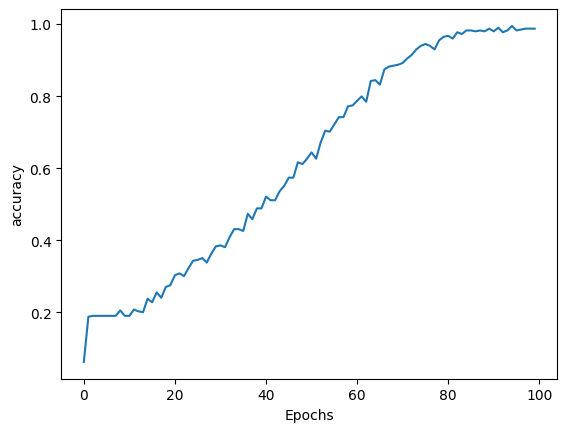

In [ ]:
plot_graphs(history, 'accuracy')

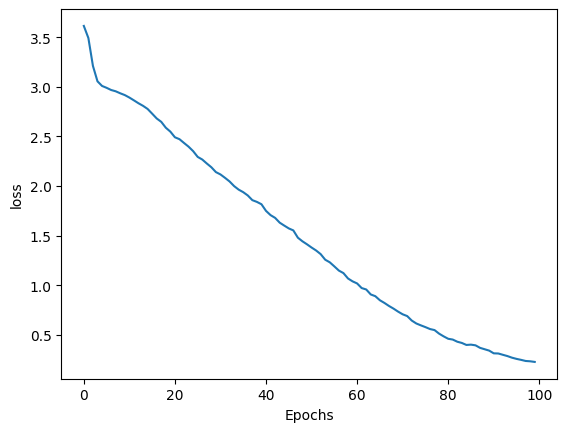

In [ ]:
plot_graphs(history, 'loss')